In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Data\CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
data_description = pd.read_excel('Data\Data Dictionary - carprices.xlsx')

In [6]:
data_description=data_description.iloc[3:29,[7,11]]
data_description.columns=['var','desc']

In [7]:
pd.set_option('display.max_colwidth', -1)
data_description

,var,desc
3,Car_ID,Unique id of each observation (Interger)
4,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
5,carCompany,Name of car company (Categorical)
6,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,aspiration,Aspiration used in a car (Categorical)
8,doornumber,Number of doors in a car (Categorical)
9,carbody,body of car (Categorical)
10,drivewheel,type of drive wheel (Categorical)
11,enginelocation,Location of car engine (Categorical)
12,wheelbase,Weelbase of car (Numeric)


In [8]:
data_description['var']=data_description['var'].apply(lambda x:x.strip().lower())

In [9]:
data[['car_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
car_ID    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [10]:
data['car_ID'].value_counts().describe()

count    205.0
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0  
Name: car_ID, dtype: float64

In [11]:
data=data.iloc[:,1:]

In [12]:
data[['symboling']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
symboling    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [13]:
data[['symboling']]=data[['symboling']].astype('category')

In [14]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2    3 
Name: symboling, dtype: int64

In [15]:
data_description=data_description.reset_index()

In [16]:
data_description[data_description['var'] == 'symboling']

,index,var,desc
1,4,symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"


In [17]:
## value associated with -2 very less and no -3

In [18]:
data['CarName'].value_counts()

toyota corolla                    6
toyota corona                     6
peugeot 504                       6
subaru dl                         4
mitsubishi outlander              3
mitsubishi g4                     3
honda civic                       3
mitsubishi mirage g4              3
toyota mark ii                    3
mazda 626                         3
toyota corolla liftback           2
honda accord                      2
volvo 144ea                       2
mazda glc deluxe                  2
toyota starlet                    2
audi 100ls                        2
subaru                            2
saab 99e                          2
honda civic cvcc                  2
nissan latio                      2
mazda rx-7 gs                     2
mazda rx-4                        2
isuzu D-Max                       2
saab 99le                         2
nissan rogue                      2
mazda glc                         2
porsche cayenne                   2
nissan clipper              

In [19]:
## This vaiable will not have good impact on regression as number of categories is very high but obs within category is very low

In [20]:
## Parked for EDA: will brand name is good?

In [21]:
data['fueltype'].value_counts()

gas       185
diesel    20 
Name: fueltype, dtype: int64

In [22]:
data['fueltype'].value_counts()

gas       185
diesel    20 
Name: fueltype, dtype: int64

In [23]:
## very low claues for diesel. 

In [24]:
data_description[data_description['var']=='aspiration']

,index,var,desc
4,7,aspiration,Aspiration used in a car (Categorical)


In [25]:
data['aspiration'].value_counts()

std      168
turbo    37 
Name: aspiration, dtype: int64

std works on atmospheric pressure where as turbo A turbocharger, colloquially known as a turbo, is a turbine-driven, forced induction device that increases an internal combustion engine's efficiency and power output by forcing extra compressed air into the combustion chamber

In [26]:
data['doornumber'].value_counts()

four    115
two     90 
Name: doornumber, dtype: int64

In [27]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64

In [28]:
data['drivewheel'].value_counts()

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

In [29]:
data['enginelocation'].value_counts()

front    202
rear     3  
Name: enginelocation, dtype: int64

In [30]:
data['drivewheel'].value_counts()

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

In [31]:
## some categies have  very low values

In [32]:
data[['wheelbase']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
wheelbase    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [33]:
data[['carheight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
carheight    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [34]:
data[['carwidth']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
carwidth    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [35]:
data[['curbweight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
curbweight    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [36]:
data_description['var'].unique()

array(['car_id', 'symboling', 'carcompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price(dependent variable)'], dtype=object)

In [37]:
data[['enginetype']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
enginetype    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [38]:
data['enginetype'].value_counts()

ohc      148
ohcf     15 
ohcv     13 
l        12 
dohc     12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

In [39]:
##rotor and dohcv have very low numbers

In [40]:
data[['cylindernumber']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
cylindernumber    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [41]:
data['cylindernumber'].value_counts()

four      159
six       24 
five      11 
eight     5  
two       4  
twelve    1  
three     1  
Name: cylindernumber, dtype: int64

In [42]:
data[['enginesize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
enginesize    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [43]:
data[['fuelsystem']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
fuelsystem    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [44]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
spfi    1 
mfi     1 
Name: fuelsystem, dtype: int64

In [45]:
data.iloc[:,17:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(4), int64(4)
memory usage: 12.9 KB


In [46]:
data_numeric=data.select_dtypes(include=[np.number])

In [47]:
data_cat=data.select_dtypes(exclude=[np.number])

In [48]:
data_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
import seaborn as sns

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

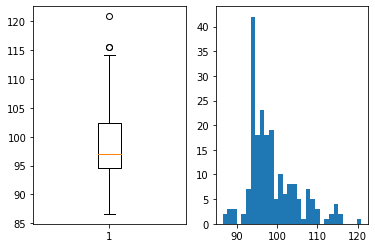

In [51]:
fig,ax = plt.subplots(ncols=2)
ax[0].boxplot(data_numeric['wheelbase'])
ax[1].hist(data_numeric['wheelbase'],bins=30)

plt.show()

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


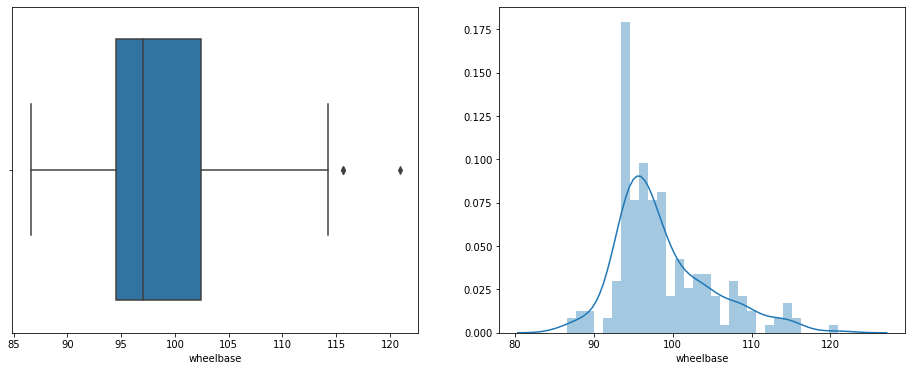

In [96]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['wheelbase'],ax=ax[0])
sns.distplot(data_numeric['wheelbase'],bins=30,ax=ax[1])

plt.show()

In [53]:
data_cat[data['wheelbase']>114]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
109,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,l,four,mpfi
110,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,l,four,idi
113,0,peugeot 504,gas,std,four,wagon,rwd,front,l,four,mpfi
114,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi


In [54]:
## nothing spcl about outliers here. Though lets exract company names

In [55]:
data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

In [56]:
data['brandName'].value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     9 
dodge          9 
buick          8 
bmw            8 
plymouth       7 
audi           7 
saab           6 
porsche        4 
isuzu          4 
jaguar         3 
alfa-romero    3 
chevrolet      3 
maxda          2 
vw             2 
renault        2 
mercury        1 
vokswagen      1 
porcshce       1 
toyouta        1 
Name: brandName, dtype: int64

In [57]:
data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen')|(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='volkswagen'

In [58]:
data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'
 

In [59]:
data['brandName'].value_counts()

toyota         32
nissan         18
volkswagen     17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
plymouth       7 
audi           7 
saab           6 
isuzu          4 
chevrolet      3 
alfa-romero    3 
jaguar         3 
renault        2 
maxda          2 
mercury        1 
Name: brandName, dtype: int64

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


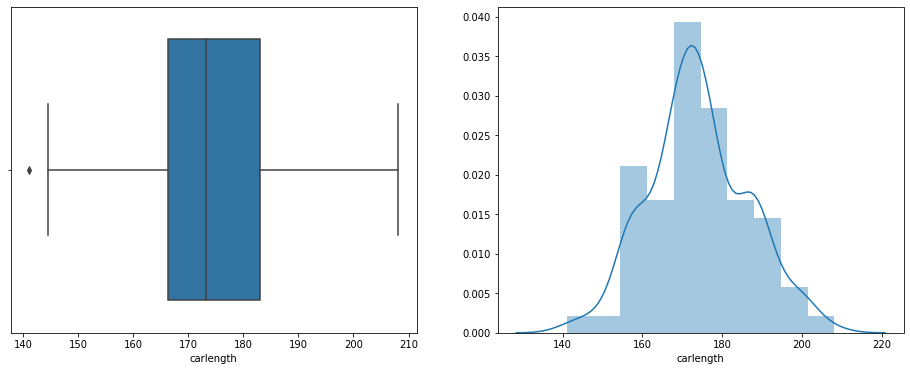

In [60]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carlength'],ax=ax[0])
sns.distplot(data_numeric['carlength'],bins=10,ax=ax[1])

plt.show()

In [61]:
data_cat[data['carlength']<143]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl


C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


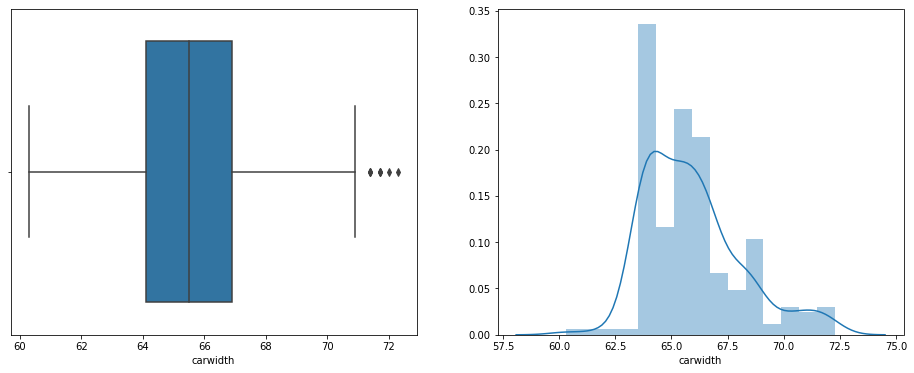

In [62]:

fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carwidth'],ax=ax[0])
sns.distplot(data_numeric['carwidth'],bins=15,ax=ax[1])

plt.show()

In [63]:
data_cat[data['carwidth']>71]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
6,1,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


In [64]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


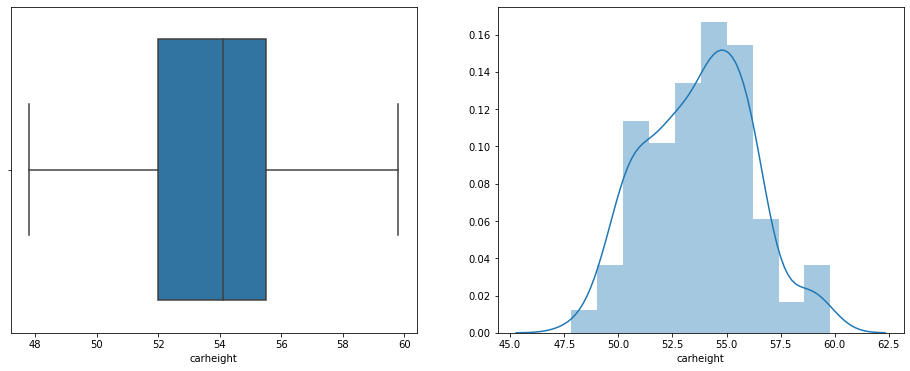

In [65]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carheight'],ax=ax[0])
sns.distplot(data_numeric['carheight'],bins=10,ax=ax[1])

plt.show()

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


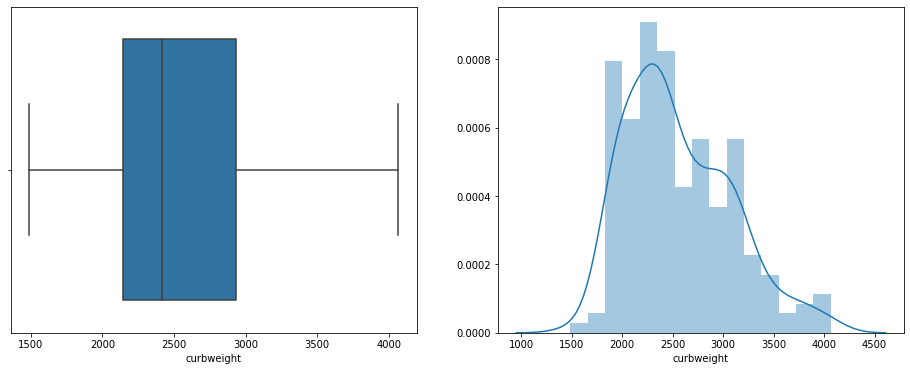

In [66]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['curbweight'],ax=ax[0])
sns.distplot(data_numeric['curbweight'],bins=15,ax=ax[1])

plt.show()

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


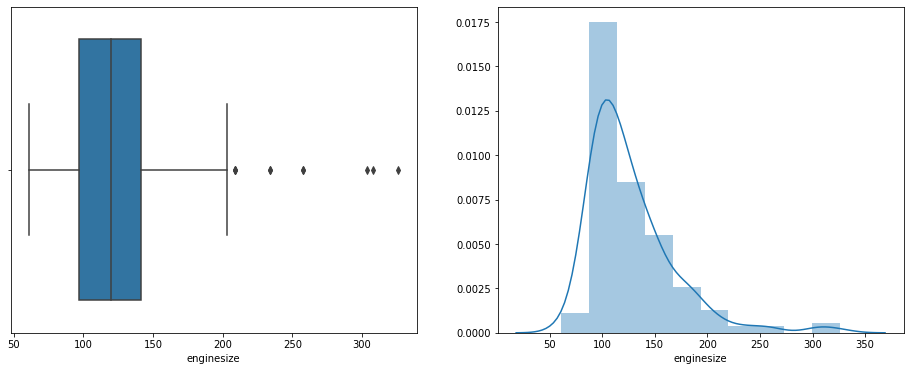

In [67]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['enginesize'],ax=ax[0])
sns.distplot(data_numeric['enginesize'],bins=10,ax=ax[1])

plt.show()

In [68]:
##This feature is more skewed then others. Might need transfrmation in later stages

In [69]:
## outliers seems to be from luxury brands

In [70]:
data_cat[data_numeric['enginesize']>200]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
15,0,bmw x4,gas,std,four,sedan,rwd,front,ohc,six,mpfi
16,0,bmw x5,gas,std,two,sedan,rwd,front,ohc,six,mpfi
17,0,bmw x3,gas,std,four,sedan,rwd,front,ohc,six,mpfi
47,0,jaguar xj,gas,std,four,sedan,rwd,front,dohc,six,mpfi
48,0,jaguar xf,gas,std,four,sedan,rwd,front,dohc,six,mpfi
49,0,jaguar xk,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
72,3,buick skylark,gas,std,two,convertible,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi


C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


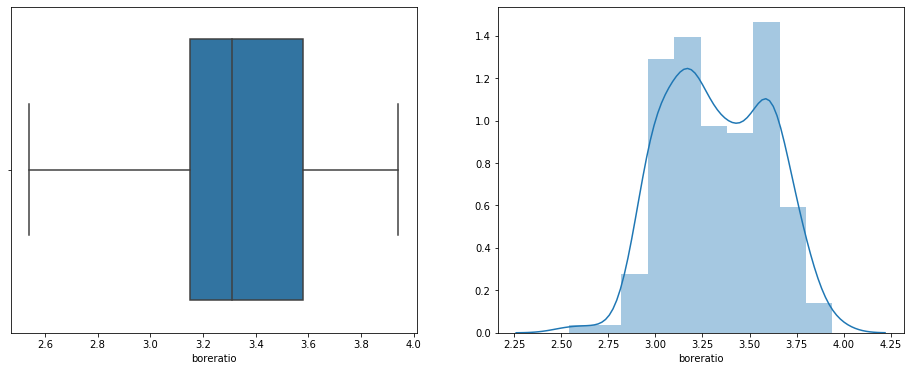

In [71]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['boreratio'],ax=ax[0])
sns.distplot(data_numeric['boreratio'],bins=10,ax=ax[1])

plt.show()

In [72]:
##looks bimodal. check with categorical variables?

In [73]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


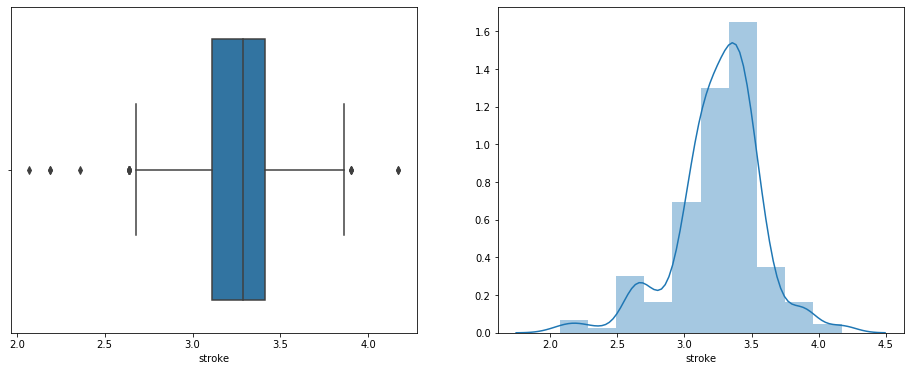

In [74]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['stroke'],ax=ax[0])
sns.distplot(data_numeric['stroke'],bins=10,ax=ax[1])

plt.show()

In [75]:
data_cat[data_numeric['stroke']>3.9]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
47,0,jaguar xj,gas,std,four,sedan,rwd,front,dohc,six,mpfi
48,0,jaguar xf,gas,std,four,sedan,rwd,front,dohc,six,mpfi


In [76]:
data_numeric['stroke'].describe()["25%"]+1.5*(data_numeric['stroke'].describe()["25%"]-data_numeric['stroke'].describe()["75%"])

2.6599999999999993

In [77]:
data_cat[data_numeric['stroke']<2.60]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
111,0,peugeot 504,gas,std,four,sedan,rwd,front,l,four,mpfi
113,0,peugeot 504,gas,std,four,wagon,rwd,front,l,four,mpfi
134,3,saab 99le,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
138,2,subaru,gas,std,two,hatchback,fwd,front,ohcf,four,2bbl


C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


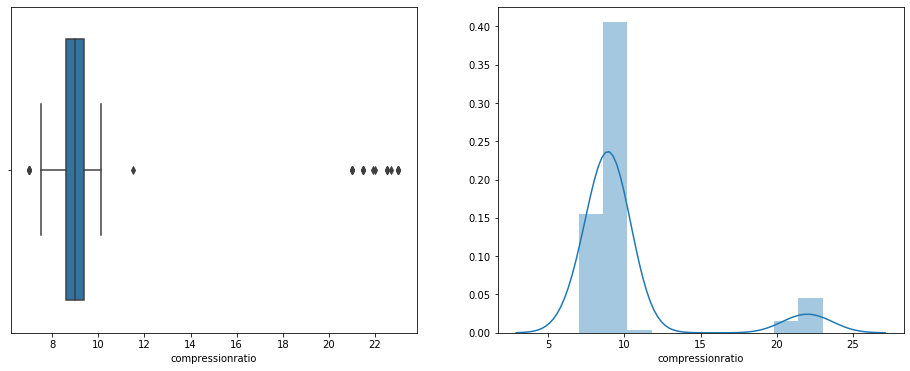

In [78]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['compressionratio'],ax=ax[0])
sns.distplot(data_numeric['compressionratio'],bins=10,ax=ax[1])

plt.show()

In [79]:
##bimodal beacuse of fuletype

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


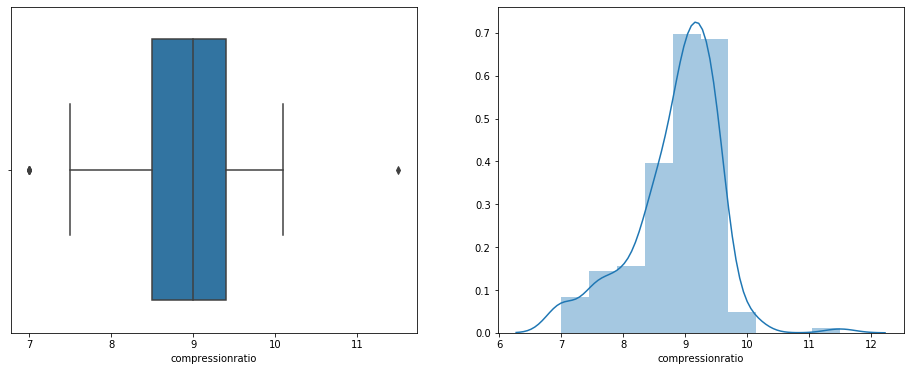

In [80]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],bins=10,ax=ax[1])

plt.show()

In [81]:
data[(data['fueltype']=='gas')&(data['compressionratio']>11)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


In [82]:
data[(data['fueltype']=='gas')&(data['compressionratio']<=7)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi
29,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,mfi,3.60,3.90,7.0,145,5000,19,24,12964.000,dodge
82,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.58,3.86,7.0,145,5000,19,24,12629.000,mitsubishi
83,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14869.000,mitsubishi
84,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14489.000,mitsubishi
117,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,...,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.000,peugeot
124,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,12764.000,plymouth


C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


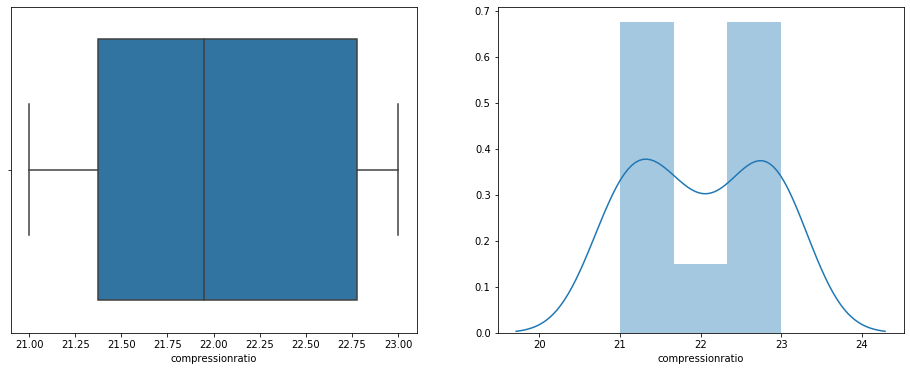

In [83]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],bins=3,ax=ax[1])

plt.show()

In [84]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


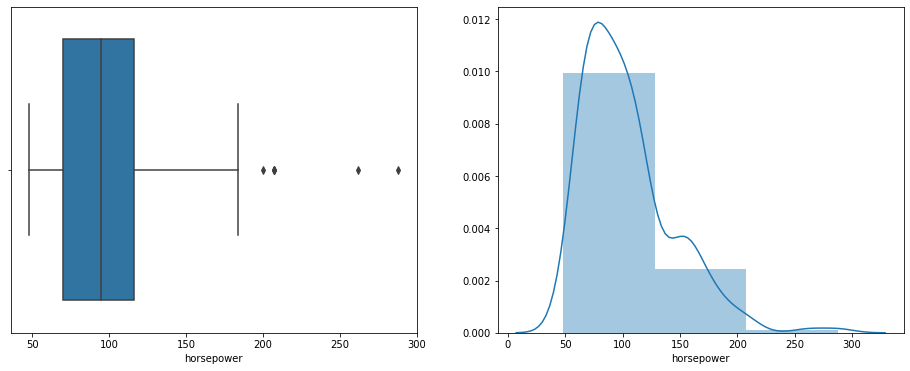

In [85]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'horsepower'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'horsepower'],bins=3,ax=ax[1])

plt.show()

In [86]:
## this alos skewed

C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


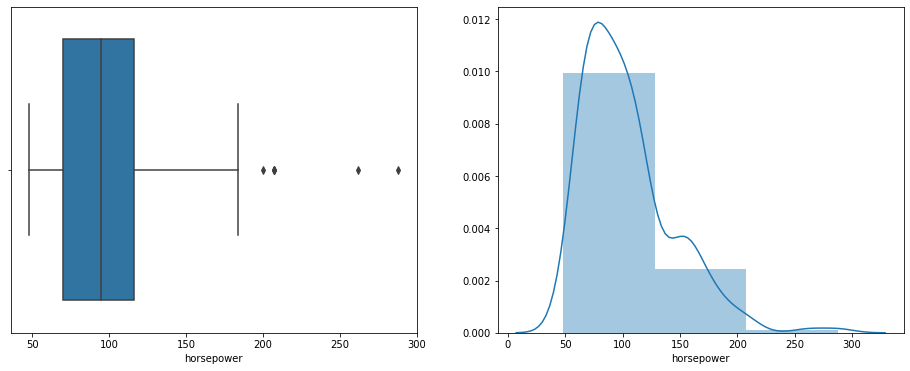

In [87]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'horsepower'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'horsepower'],bins=3,ax=ax[1])

plt.show()

In [88]:
data_numeric['horsepower'].describe()["75%"]-1.5*(data_numeric['horsepower'].describe()["25%"]-data_numeric['horsepower'].describe()["75%"])

185.0

In [89]:
data_cat[data_numeric['horsepower']>185]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
49,0,jaguar xk,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi
105,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,ohcf,six,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


C:\Users\prateekk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


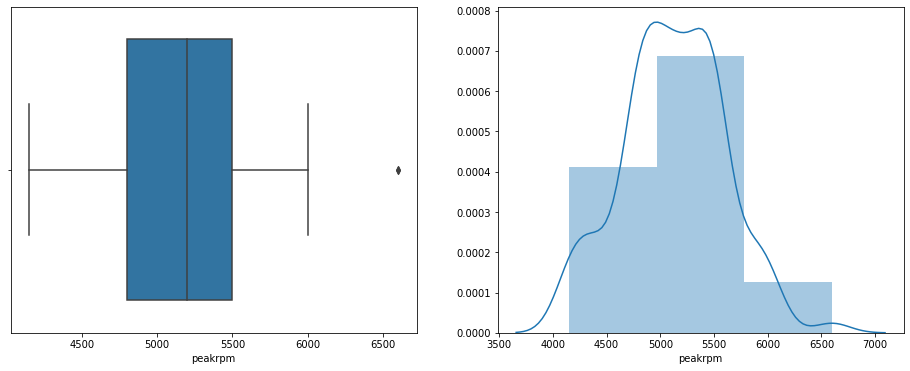

In [90]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'peakrpm'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'peakrpm'],bins=3,ax=ax[1])

plt.show()

In [91]:
data_cat[data_numeric['peakrpm']>6500]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
165,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,dohc,four,mpfi
166,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,dohc,four,mpfi


In [92]:
citympg', 'highwaympg', 'price'

SyntaxError: invalid syntax (<ipython-input-92-de553738586c>, line 1)

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric.loc[:,'citympg']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'citympg']),bins=3,ax=ax[1])

plt.show()

In [ ]:
##log of citmpg remove outliers and is more normal

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'citympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'citympg'],bins=3,ax=ax[1])

plt.show()

In [ ]:
data_cat[data_numeric['citympg']>45]

In [ ]:
'highwaympg', 'price'

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'highwaympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'highwaympg'],bins=3,ax=ax[1])

plt.show()

In [ ]:
data_cat[data_numeric['highwaympg']>47]

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'price'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'price'],bins=3,ax=ax[1])

plt.show()

In [ ]:
##price is skewed. will log help

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric.loc[:,'price']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'price']),bins=3,ax=ax[1])

plt.show()

In [ ]:
##cluster analysis in R with gower's distance. for only cluster analysis i will transform varaibles